<a href="https://colab.research.google.com/github/abou-zithar/tansorFlow_Linear_reg/blob/main/TensorFlow_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf


In [ ]:
from tensorflow.python.framework.ops import enable_eager_execution

In [ ]:
enable_eager_execution()

In [ ]:
x1=tf.constant([5])
x2=tf.constant([6])
res=tf.multiply(x1,x2)
print(res)

tf.Tensor([30], shape=(1,), dtype=int32)


In [ ]:
matrix_one=tf.constant([[1,2,3],[4,5,6],[7,8,9]])
matrix_two=tf.constant([[2,2,4],[5,7,8],[9,6,2]])

result=tf.add(matrix_one,matrix_two)
print(result.numpy())

[[ 3  4  7]
 [ 9 12 14]
 [16 14 11]]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



In [ ]:
data=pd.read_csv('/content/FuelConsumption.csv')

In [ ]:
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
train_x=data.loc[:,['ENGINESIZE']].values
train_y=data.loc[:,['CO2EMISSIONS']].values

In [ ]:
w=tf.Variable(20.0)
b=tf.Variable(30.2)

def h(x):
  y=w*x+b
  return y

In [ ]:
def costfunction(y_true,y_predict):
  error=tf.reduce_mean(tf.square(y_true-y_predict))
  return error

In [ ]:
#new_w=old_w-learningRate*derivative

learningRate=0.01

trainnig_iteration=200



# add w,b value to list just to visualize the data 

w_values=[]
b_values=[]
loss_values=[]

for iteration in range(trainnig_iteration):
  with tf.GradientTape() as tape:
    y_predict=h(train_x)
    cost_value=costfunction(train_y,y_predict)
    loss_values.append(cost_value)
    gradiant=tape.gradient(cost_value,[w,b])
    w_values.append(w.numpy())
    b_values.append(b.numpy())
    w.assign_sub(learningRate*gradiant[0])
    b.assign_sub(learningRate*gradiant[1])
    



    #b.assign_sub=>b=b-
    #w.assign_sub=>w=w-

# gradiant
# return two values first the value of the derivative of w 
# second the value of the derivative of b



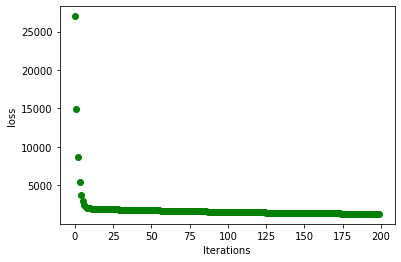

In [ ]:
plt.xlabel('Iterations')
plt.ylabel('loss')
plt.plot(loss_values,'go')

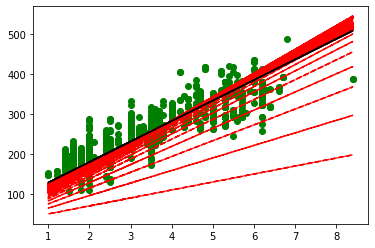

In [ ]:
plt.scatter(train_x,train_y,color='green')

for w,b in zip(w_values[0:len(w_values)],b_values[0:len(b_values)]):
  plt.plot(train_x,train_x*w+b,color='red',linestyle='dashed')
plt.plot(train_x,train_x*w_values[-1]+b_values[-1],color='black')
plt.show()